In [9]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d

In [2]:
def visualize_loss(convergence_log_file):
    data = []
    with open(convergence_log_file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            lst = line.split(',')
            lst[-1] = lst[-1][:-1]
            data.append(lst)
    df = pd.DataFrame(data)
    df = df.rename(columns=df.iloc[0])
    df = df.drop(0)
    df.columns = df.columns.str.strip()
    df["epoch"] = df["epoch"].str[6:].astype(int)

    for x in df.columns[1:]:
        try:
            df[x] = df[x].str.strip().replace("NA",np.nan).astype(float)
        except:
            pass

    plot_df = df[["epoch","avg_train_loss","avg_valid_loss"]]

    sns.set(rc = {'figure.figsize':(12,6)})
    sns.set_style("whitegrid")
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

    _ = sns.lineplot(x="epoch", y="value", hue="variable",  data=pd.melt(plot_df, ["epoch"]))


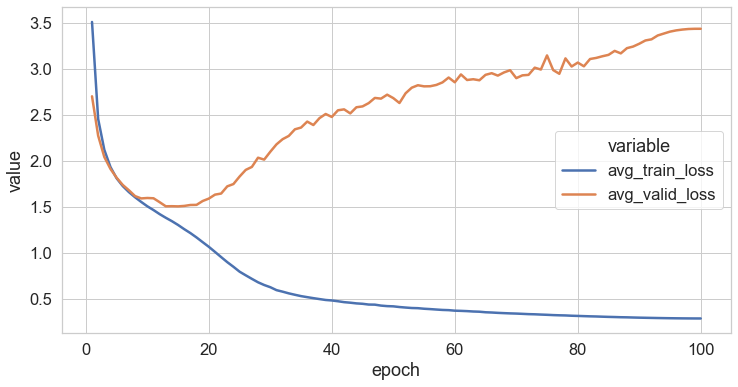

In [3]:
visualize_loss('convergence_moses.log')

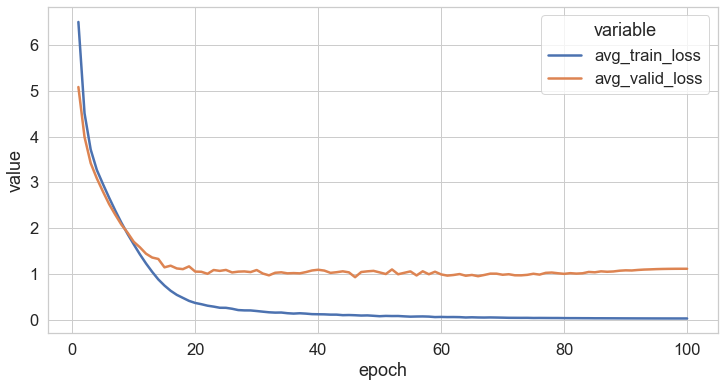

In [4]:
visualize_loss('convergence_protac.log')

In [40]:
def visualize_fraction(generation_log_file):
    data = []
    with open(generation_log_file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            lst = line.split(',')
            data.append(lst)
    df = pd.DataFrame(data)
    df = df.rename(columns=df.iloc[0])
    df = df.drop(0)
    df = df.drop(1)
    df.columns = df.columns.str.strip()
    df["set"] = df["set"].str[6:].astype(int)

    for x in df.columns[1:]:
        try:
            df[x] = df[x].str.strip().replace("NA",np.nan).astype(float)
        except:
            pass


    plot_df = df[["set","fraction_valid"]]

    sns.set(rc = {'figure.figsize':(12,6)})
    sns.set_style("whitegrid")
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

    data_df = pd.melt(plot_df, ["set"])
    x_vals = np.array(data_df['set'].tolist())
    y_vals = np.array(data_df['value'].tolist())


    _ = sns.lineplot(x="set", y="value", hue="variable",  data=data_df)
    _.set_xlabel("epoch")

    upper = gaussian_filter1d(y_vals + 0.005, sigma=3)
    lower = gaussian_filter1d(y_vals - 0.005, sigma=3)
    _.fill_between(x_vals, upper, lower, color='crimson', alpha=0.2)

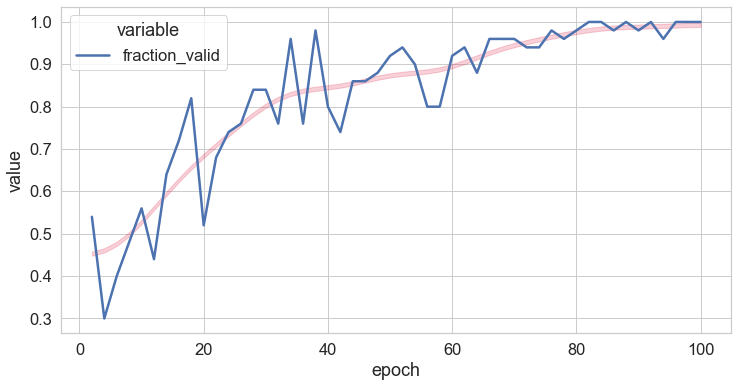

In [41]:
visualize_fraction("generation_moses.log")

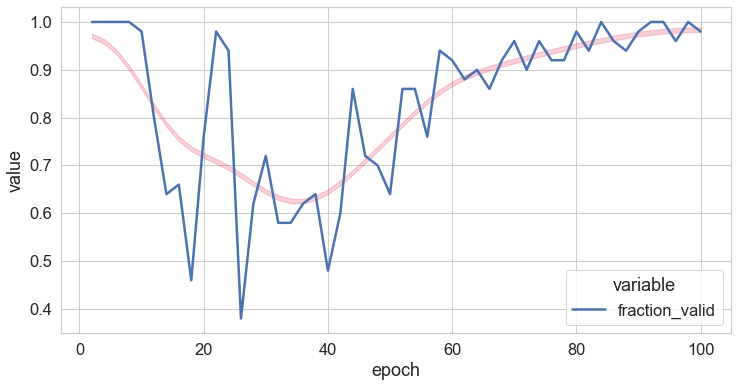

In [42]:
visualize_fraction("generation_protac.log")